# The Sparks Foundation Internship
### Name: Jeet Maheshbhai Joshi
### Domain: IOT & Computer Vision

## Task 2 :- Color Identification in Images

#### Step: 1 :- Importing the Modules

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

#### Step: 2:- Image Reading, BRG to RGB Conversion and Resizing

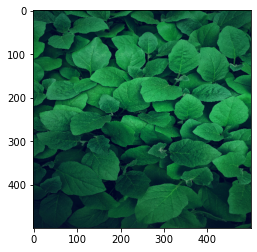

In [2]:
image_path = '.\\images\\image_1.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(500,500))
plt.imshow(img)

#### Step: 3:- Copy of Image to saperate all process from orignal Image

In [3]:
img_array = img.copy()

#### Step: 4:- Simple Red, Green, Blue Classification..........

In [4]:
#RGB Classification.............

def get_avg_color(im):
    length = np.shape(im)[0]*np.shape(im)[1]
    R_filter_array = np.array([1,0,0])
    G_filter_array = np.array([0,1,0])
    B_filter_array = np.array([0,0,1])
    R_img = np.matmul(im,R_filter_array)
    G_img = np.matmul(im,G_filter_array)
    B_img = np.matmul(im,B_filter_array)
    R_avg = np.sum(R_img)//length
    G_avg = np.sum(G_img)//length
    B_avg = np.sum(B_img)//length
    return [[R_avg,G_avg,B_avg],[R_img,G_img,B_img]]

def decider(results):
    Mx = max(results)
    for i in range(len(results)):
        if results[i] == Mx:
            temp = i
    if temp == 0:
        return 'Redish Image'
    elif temp == 1:
        return 'Greenish Image'
    elif temp == 2:
        return "Bluesh Image"

results = get_avg_color(img_array)
R,G,B = results[0]
R_img,G_img,B_img = results[1]

print(decider(results[0]))
print(R,G,B)

Greenish Image
17 90 57


#### Step: 5:- Multi-Color Classification...(Top 10 Color).......

[array([ 24.64732092, 138.75659774,  67.00965383]),
 array([ 4.07646033, 35.56707796, 40.76156134]),
 array([ 54.82591973, 170.86053512,  99.95117057]),
 array([14.31326139, 94.18104048, 54.58912971]),
 array([ 32.12631408, 124.53495177,  74.2267801 ]),
 array([ 2.27657193, 16.12249367, 36.90660892]),
 array([ 6.82325299, 54.64772073, 44.67684291]),
 array([ 39.3106612 , 151.58775528,  84.60328173]),
 array([ 9.96422033, 75.09638479, 48.91419705]),
 array([ 19.25354374, 112.83459535,  60.35516113])]

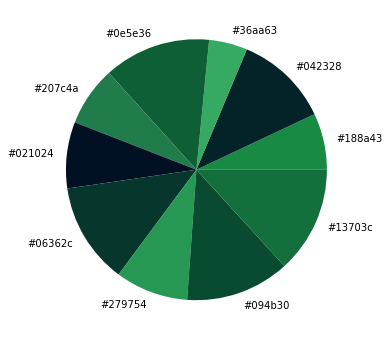

In [5]:
# Multiclass Classification............................

from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (500, 500), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

get_colors(img, 10, True)

#### Step 6:- Image Search by Color........

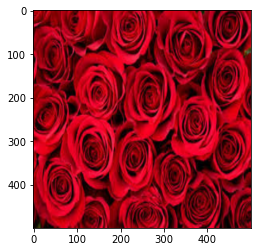

In [6]:
def Search(Color):
    if Color == 'Red':
        temp = 0
    elif Color == 'Green':
        temp = 1
    elif Color == 'Blue':
        temp = 2
    else:
        print('Enter Color from Red, Green Or Blue')
    for i in range(5):
        image = cv2.imread(f'.\\images\\image_{i}.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(500,500))
        results = get_avg_color(image)
        mx = np.argmax(results[0])
        for j in results[0]:
            if mx == temp:
                plt.imshow(image)
                plt.show()
                break
                
Search('Red')    

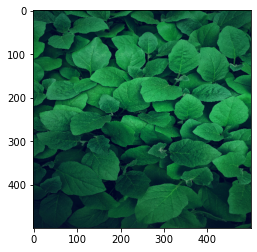

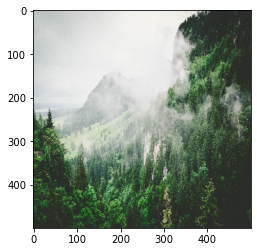

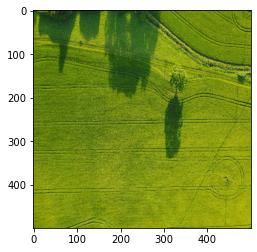

In [7]:
Search('Green') 

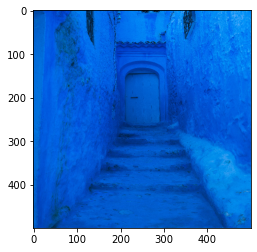

In [8]:
Search('Blue') 